# **Project Summary**:
##Forecasting U.S. Housing Prices Using Machine Learning Models
This notebook focuses on analyzing and predicting U.S. housing prices using various economic and demographic indicators. The dataset includes the Case-Shiller Home Price Index along with features such as GDP per capita, CPI, unemployment rate, median income, and more.

### **Data Preprocessing**
Loaded and indexed the dataset by the DATE column

Removed columns with low correlation and multicollinearity based on Pearson correlation analysis

### **Feature Analysis**
Visualized the relationship between each feature and the target variable using scatter plots

Performed time series decomposition to observe trend, seasonal, and residual components

### **Model Training and Evaluation**
Scaled input features using StandardScaler

Trained and evaluated multiple regression models including:

Linear Regression

ElasticNet

Random Forest

Gradient Boosting

Support Vector Regressor (SVR)

XGBoost Regressor

Evaluation metrics included Mean Squared Error (MSE) and R² Score

Plotted actual vs. predicted prices for each model using Seaborn for better visualization

### **Results**
Random Forest Regressor achieved the best performance with an MSE of 1.67 and an R² Score of 0.999

A comparative heatmap was used to summarize the performance of all models clearly

In [1]:
# Load essential Python libraries for data handling and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tools for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the preprocessed housing dataset and set 'DATE' as the index
house_price_data = pd.read_csv("prepared_dataset.csv")
house_price_data.set_index("DATE", inplace=True)

# Display the first few rows
house_price_data.head()


,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,EmpRate,Cons_Material,Population,median_income,Num_Households
DATE,,,,,,,,,,,
2005-01-01,161.289,2005.0,1.0,53719.000000,191.6,5.3,71.31705,191.6,294768,69310.000000,1.016133e+07
2005-02-01,163.346,2005.0,2.0,53768.666667,192.4,5.4,71.23407,192.4,294955,69374.166667,1.017406e+07
2005-03-01,165.814,2005.0,3.0,53818.333333,193.1,5.2,71.28392,193.1,295149,69438.333333,1.018680e+07
2005-04-01,167.503,2005.0,4.0,53868.000000,193.7,5.2,71.41814,193.7,295359,69502.500000,1.019954e+07
2005-05-01,169.352,2005.0,5.0,53963.000000,193.6,5.1,71.52487,193.6,295582,69566.666667,1.021175e+07


In [3]:
# Remove redundant time-based columns
house_price_data.drop(columns=["Year", "Month"], inplace=True)


In [4]:
# Viewing basic statistical insights of the dataset
stats_overview = house_price_data.describe()
stats_overview


,CSUSHPISA,Per_Capita_GDP,CPI,UNRATE,EmpRate,Cons_Material,Population,median_income,Num_Households
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02
mean,188.569744,58311.982063,236.992359,5.960090,69.389159,236.992359,318012.390135,72452.645740,1.106150e+07
std,45.315150,4087.801691,26.911919,2.154144,2.095888,26.911919,12342.968899,5115.389287,5.232275e+05
min,136.526000,53017.000000,191.600000,3.400000,60.168550,191.600000,294768.000000,65740.000000,1.016133e+07
25%,155.871000,54942.000000,217.257500,4.400000,67.479600,217.257500,307698.000000,68009.166667,1.052645e+07
50%,178.028000,56968.000000,235.547000,5.100000,69.569900,235.547000,319020.000000,70696.666667,1.112582e+07
75%,205.898000,61572.833333,252.680500,7.650000,71.328335,252.680500,329593.000000,78050.000000,1.152883e+07
max,306.234000,67499.000000,304.615000,14.800000,72.314130,304.615000,337200.000000,81210.000000,1.189384e+07


In [5]:
# Extract the target column and isolate input features
target = house_price_data.pop("CSUSHPISA")
features = house_price_data


In [6]:
# Compute absolute correlation between each feature and the target variable
correlation_scores = features.apply(lambda col: np.abs(col.corr(target)))

# Sort correlations in increasing order to identify weaker relationships
sorted_scores = correlation_scores.sort_values()

# Show features that are less correlated with the target
print("Features Least Correlated with Case-Shiller Index:")
print(sorted_scores)


Features Least Correlated with Case-Shiller Index:
EmpRate           0.463617
UNRATE            0.568912
Population        0.676931
Num_Households    0.740167
Cons_Material     0.832593
CPI               0.832593
median_income     0.849169
Per_Capita_GDP    0.912062
dtype: float64


In [7]:
# Importing tools for scaling, regression models, and feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor



In [9]:
# Drop selected multicollinear or less relevant features
columns_to_remove = ["EmpRate", "UNRATE"]
house_price_data.drop(columns=columns_to_remove, inplace=True)

# Update the features set after column removal
features = house_price_data
features


,Per_Capita_GDP,CPI,Cons_Material,Population,median_income,Num_Households
DATE,,,,,,
2005-01-01,53719.000000,191.600,191.600,294768,69310.000000,1.016133e+07
2005-02-01,53768.666667,192.400,192.400,294955,69374.166667,1.017406e+07
2005-03-01,53818.333333,193.100,193.100,295149,69438.333333,1.018680e+07
2005-04-01,53868.000000,193.700,193.700,295359,69502.500000,1.019954e+07
2005-05-01,53963.000000,193.600,193.600,295582,69566.666667,1.021175e+07
...,...,...,...,...,...,...
2023-03-01,66854.333333,301.643,301.643,336232,80610.000000,1.188998e+07
2023-04-01,66945.000000,302.858,302.858,336451,80610.000000,1.189384e+07
2023-05-01,67129.666667,303.316,303.316,336679,80610.000000,1.189197e+07


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Initialize the scaler and normalize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Dictionary of regression models to evaluate
regression_models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor()
}



Model: Linear Regression
Mean Squared Error (MSE): 73.0166
R² Score: 0.9647
Coefficients:
  Per_Capita_GDP: 19.5697
  CPI: 24.2489
  Cons_Material: 24.2489
  Population: -84.4869
  median_income: 16.0217
  Num_Households: 39.6455
Intercept: 188.4807

Model: Elastic Net
Mean Squared Error (MSE): 435.2428
R² Score: 0.7895
Coefficients:
  Per_Capita_GDP: 12.1051
  CPI: 7.4988
  Cons_Material: 7.5008
  Population: -1.5425
  median_income: 10.7909
  Num_Households: 0.0000
Intercept: 188.4807

Model: Random Forest
Mean Squared Error (MSE): 1.6660
R² Score: 0.9992
Feature Importances:
  Per_Capita_GDP: 0.0334
  CPI: 0.1245
  Cons_Material: 0.2585
  Population: 0.2201
  median_income: 0.1588
  Num_Households: 0.2047

Model: Gradient Boosting
Mean Squared Error (MSE): 2.9354
R² Score: 0.9986
Feature Importances:
  Per_Capita_GDP: 0.0150
  CPI: 0.0503
  Cons_Material: 0.1585
  Population: 0.4478
  median_income: 0.1589
  Num_Households: 0.1694

Model: Support Vector Regressor
Mean Squared Error

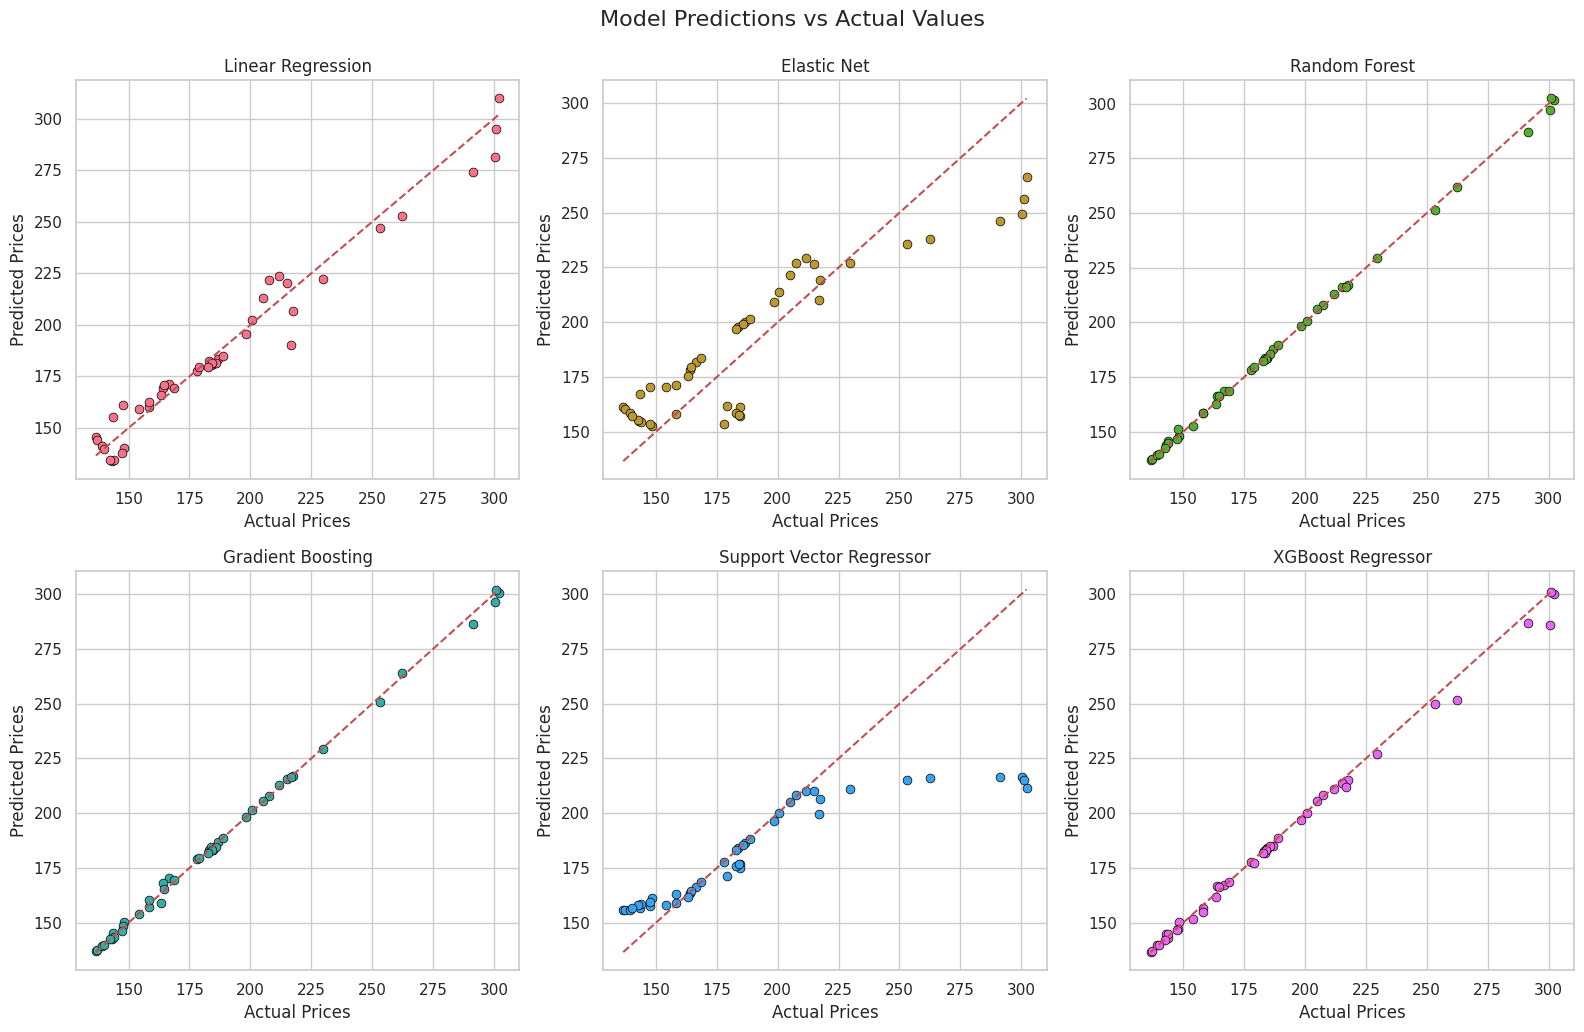


Top Performing Model: RandomForestRegressor with MSE: 1.6660


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Track best-performing model
best_model = None
lowest_mse = float('inf')

# Define a color palette
colors = sns.color_palette("husl", len(regression_models))

# Create subplots for side-by-side model comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Loop through and evaluate each model
for idx, (model_name, model) in enumerate(regression_models.items()):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"\nModel: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Print model coefficients or feature importances
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feat, coef in zip(X_train.columns, model.coef_):
            print(f"  {feat}: {coef:.4f}")
        print(f"Intercept: {model.intercept_:.4f}")
    elif hasattr(model, 'feature_importances_'):
        print("Feature Importances:")
        for feat, score in zip(X_train.columns, model.feature_importances_):
            print(f"  {feat}: {score:.4f}")

    if mse < lowest_mse:
        lowest_mse = mse
        best_model = model

    # Plot using Seaborn with distinct colors
    ax = axes[idx]
    sns.scatterplot(x=y_test, y=predictions, ax=ax, color=colors[idx], s=40, edgecolor='black')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1.5)  # Diagonal reference
    ax.set_title(f"{model_name}", fontsize=12)
    ax.set_xlabel("Actual Prices")
    ax.set_ylabel("Predicted Prices")

plt.tight_layout()
plt.suptitle("Model Predictions vs Actual Values", fontsize=16, y=1.03)
plt.show()

# Report best model
print(f"\nTop Performing Model: {type(best_model).__name__} with MSE: {lowest_mse:.4f}")


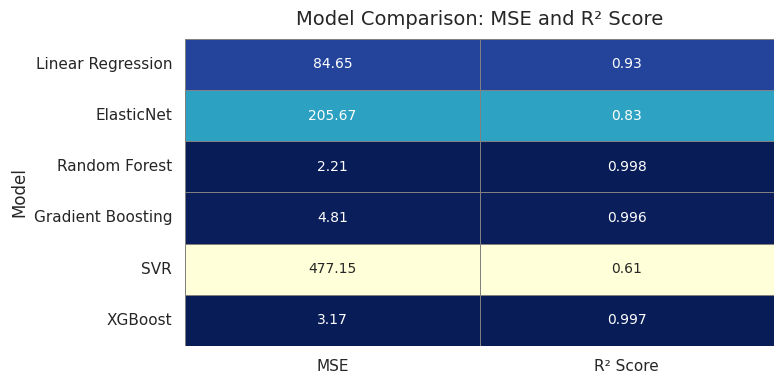

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation results
model_performance = {
    'Model': [
        'Linear Regression',
        'ElasticNet',
        'Random Forest',
        'Gradient Boosting',
        'SVR',
        'XGBoost'
    ],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R² Score': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

# Create DataFrame
df_eval = pd.DataFrame(model_performance)

# Set model names as index
df_eval.set_index("Model", inplace=True)

# Normalize for color scaling
norm_df = df_eval.copy()
norm_df["MSE"] = norm_df["MSE"].max() - norm_df["MSE"]  # Reverse MSE so lower is better
norm_df = (norm_df - norm_df.min()) / (norm_df.max() - norm_df.min())

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    norm_df,
    annot=df_eval.round(3),
    fmt='',
    cmap="YlGnBu",
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 10}
)

plt.title("Model Comparison: MSE and R² Score", fontsize=14, pad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
